In [1]:
pip install pandas nltk scikit-learn transformers textblob plotly


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.2 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/10.2 MB 6.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/10.2 MB 6.7 MB/s eta 0:00:02
   ------------------- -------------------- 5.0/10.2 MB 7.0 MB/s eta 0:00:01
   ------------------------- -------------- 6.6/10.2 MB 6.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.1/10.2 MB 7.0 MB/s eta 0:00:01
   -------------------------------------- - 9.7/10.2 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 10.2/10.2 MB 7.0 MB/s eta 0:00:00
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   --------------------- ------------------ 1.3/2.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.

In [47]:
from transformers import pipeline

from textblob import TextBlob

In [37]:
!pip install textblob

In [17]:
def preprocess_chat(chat_text):
    messages = []
    pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}) - ([^:]+): (.+)'
    matches = re.findall(pattern, chat_text)
    
    for match in matches:
        date, user, message = match
        messages.append([date, user, message])
    
    df = pd.DataFrame(messages, columns=['timestamp', 'user', 'message'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y, %H:%M', errors='coerce')
    return df

In [21]:
with open("chat.txt", "r", encoding="utf-8") as f:
    chat_text = f.read()

df = preprocess_chat(chat_text)
print(df.head())

            timestamp                                            user  \
0 2025-02-05 00:43:00  You joined a group via invite in the community   
1 2025-02-05 07:50:00                                 +91 88303 18056   
2 2025-02-05 10:14:00                                 +91 91453 10087   
3 2025-02-05 10:28:00                                 +91 91453 10087   
4 2025-02-05 10:31:00                                       tpritha03   

                                             message  
0                   r/Nagpur 🍊 WA Community Official  
1  it was indeed it was unexpected for me as well...  
2  I'm not a huge creed fan. It is kinda post gru...  
3  Hi @917368825023 you missed the jam meet up la...  
4                                         Hey, yeah!  


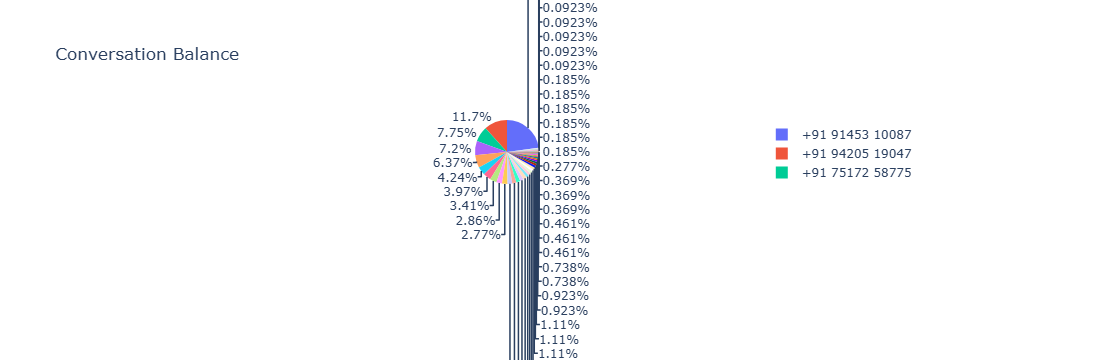

In [23]:
# Step 2: Conversation Balance
user_counts = df['user'].value_counts()
fig = px.pie(values=user_counts.values, names=user_counts.index, title="Conversation Balance")
fig.show()


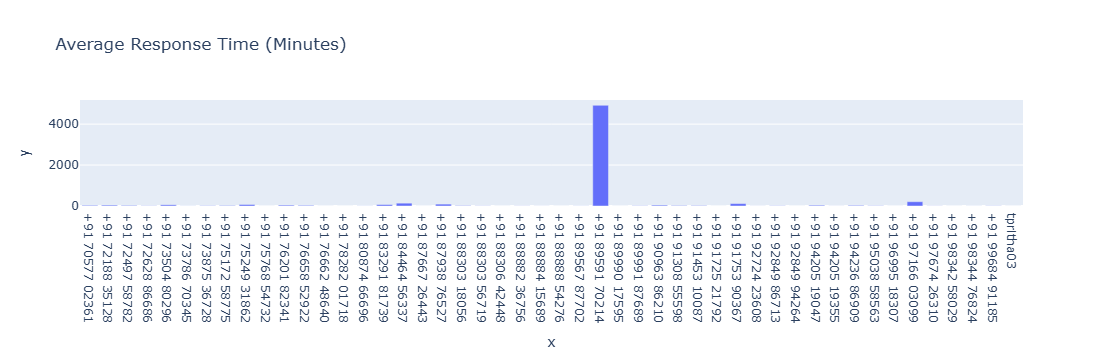

In [27]:
# Step 3: Response Time Analysis
df['response_time'] = df['timestamp'].diff().dt.total_seconds() / 60
avg_response_time = df.groupby('user')['response_time'].mean().dropna()
fig = px.bar(x=avg_response_time.index, y=avg_response_time.values, title="Average Response Time (Minutes)")
fig.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df['message'] contains the chat messages
vectorizer = TfidfVectorizer(ngram_range=(2, 3), stop_words="english")
X = vectorizer.fit_transform(df['message'].dropna())

common_phrases = pd.DataFrame(
    X.sum(axis=0), columns=vectorizer.get_feature_names_out()
).T

print(common_phrases)


                                                         0
05 30                                             1.000000
0ev_a 85i                                         0.346784
0ev_a 85i si                                      0.346784
0oks4fnzhnp5qptztoet7c si                         0.236564
0oks4fnzhnp5qptztoet7c si si8gwydksjmulpipvog9ma  0.236564
...                                                    ...
कल पस उसक                                         0.242536
पस उसक                                            0.242536
पस उसक और                                         0.242536
सल कर                                             0.242536
सल कर और                                          0.242536

[5834 rows x 1 columns]


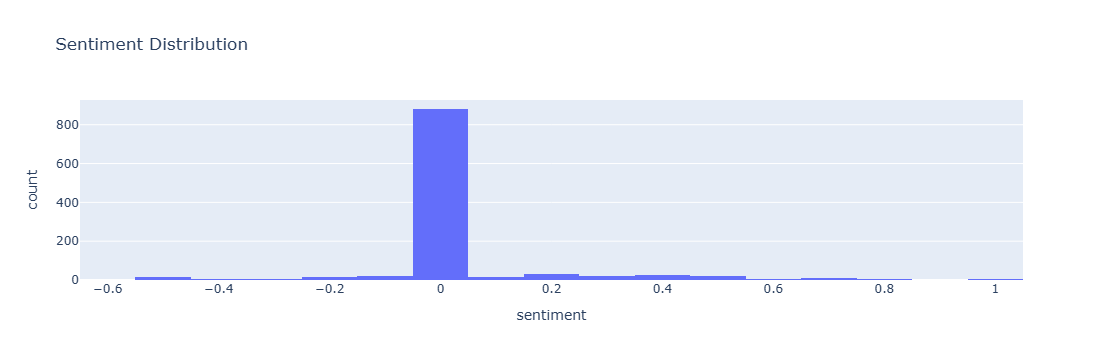

In [43]:
# Step 5: Sentiment Analysis
df['sentiment'] = df['message'].apply(lambda x: TextBlob(x).sentiment.polarity)
fig = px.histogram(df, x='sentiment', nbins=20, title="Sentiment Distribution")
fig.show()

In [50]:
# Step 6: Personality Trait Detection (OCEAN Model)
personality_analyzer = pipeline("text-classification", model="bigfive/bert-base-uncased")
sample_text = "I love solving problems and exploring new ideas."
result = personality_analyzer(sample_text)
print("Personality Analysis Result:", result)

OSError: bigfive/bert-base-uncased is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [57]:
!pip install keras==2.12.0

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.7.0
    Uninstalling keras-3.7.0:
      Successfully uninstalled keras-3.7.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires keras>=3.5.0, but you have keras 2.12.0 which is incompatible.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


In [52]:
from transformers import pipeline

personality_analyzer = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")
sample_text = "I love solving problems and exploring new ideas."
result = personality_analyzer(sample_text)

print(result)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

C:\Users\tprit\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tprit\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [ ]:
from peft import PeftModel
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Define model paths
base_model_path = "models/llama-13b"
peft_model_path = "genies-models/llama-13b-personality_traits"

# Load base model
base_model = AutoModelForSequenceClassification.from_pretrained(base_model_path)

# Load PEFT adapter model
model = PeftModel.from_pretrained(base_model, peft_model_path)

# Load tokenizer (Required for text preprocessing)
tokenizer = AutoTokenizer.from_pretrained(base_model_path)

# Example text for inference
sample_text = "I enjoy solving complex problems and working with people."

# Tokenize input
inputs = tokenizer(sample_text, return_tensors="pt", padding=True, truncation=True)

# Get model prediction
outputs = model(**inputs)

# Process logits into readable output
predictions = outputs.logits.argmax(dim=-1).item()
print(f"Predicted Personality Trait: {predictions}")
